<a href="https://colab.research.google.com/github/vyshnavinellore/2216129_AIML_BootCamp/blob/main/_Outbreak(Malaria)_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv('/content/sample_data/outbreak_detect.csv')
print(df)

    maxTemp  minTemp  avgHumidity  Rainfall  Positive   pf Outbreak
0      29.0     18.0        49.74      0.00      2156  112       No
1      34.0     23.0        83.27     15.22     10717  677      Yes
2      40.0     23.0        50.74      0.00      1257  127       No
3       NaN     24.0        84.57     11.15      9693  482       No
4      34.0     24.0        59.16      9.06      4198  211       No
5      34.0     27.0        73.23      0.00     11808  712      Yes
6      31.0     24.0        88.77     41.40     10881  648      Yes
7      33.0     24.0        77.94     23.88      8830  459      Yes
8      31.0     24.0        84.57     11.15      9693  482       No
9      36.0     24.0        53.40      2.12      9310  549       No
10     32.0     23.0        57.50      0.00     13154  838      Yes
11     34.0     18.0        59.40      0.00      2197  136       No
12     42.0     24.0        49.43      2.19      3362  213       No
13     45.0     32.0        34.74      0.38     

In [2]:
df.shape

(26, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull

<bound method DataFrame.isnull of     maxTemp  minTemp  avgHumidity  Rainfall  Positive   pf Outbreak
0      29.0     18.0        49.74      0.00      2156  112       No
1      34.0     23.0        83.27     15.22     10717  677      Yes
2      40.0     23.0        50.74      0.00      1257  127       No
4      34.0     24.0        59.16      9.06      4198  211       No
5      34.0     27.0        73.23      0.00     11808  712      Yes
6      31.0     24.0        88.77     41.40     10881  648      Yes
7      33.0     24.0        77.94     23.88      8830  459      Yes
8      31.0     24.0        84.57     11.15      9693  482       No
9      36.0     24.0        53.40      2.12      9310  549       No
10     32.0     23.0        57.50      0.00     13154  838      Yes
11     34.0     18.0        59.40      0.00      2197  136       No
12     42.0     24.0        49.43      2.19      3362  213       No
13     45.0     32.0        34.74      0.38       416   26       No
14     43.0   

In [6]:
df.shape

(23, 7)

In [7]:
import seaborn as sns
import numpy as np

In [8]:
#data processing
from sklearn import preprocessing  
#labelencodingg
LE=preprocessing.LabelEncoder()
#fitting it to our dataset
df.Outbreak=LE.fit_transform(df.Outbreak)
print(df.Outbreak)

0     0
1     1
2     0
4     0
5     1
6     1
7     1
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    1
16    0
17    1
19    0
20    0
21    1
22    0
23    1
24    0
Name: Outbreak, dtype: int64


In [9]:
#df=df.drop('maxTemp',axis=1)
#df=df.drop('minTemp',axis=1)

In [10]:
df.shape

(23, 7)

In [11]:
x=np.array(df[['avgHumidity','Rainfall','Positive','pf']])
y=np.array(df[['Outbreak']])
x

array([[4.9740e+01, 0.0000e+00, 2.1560e+03, 1.1200e+02],
       [8.3270e+01, 1.5220e+01, 1.0717e+04, 6.7700e+02],
       [5.0740e+01, 0.0000e+00, 1.2570e+03, 1.2700e+02],
       [5.9160e+01, 9.0600e+00, 4.1980e+03, 2.1100e+02],
       [7.3230e+01, 0.0000e+00, 1.1808e+04, 7.1200e+02],
       [8.8770e+01, 4.1400e+01, 1.0881e+04, 6.4800e+02],
       [7.7940e+01, 2.3880e+01, 8.8300e+03, 4.5900e+02],
       [8.4570e+01, 1.1150e+01, 9.6930e+03, 4.8200e+02],
       [5.3400e+01, 2.1200e+00, 9.3100e+03, 5.4900e+02],
       [5.7500e+01, 0.0000e+00, 1.3154e+04, 8.3800e+02],
       [5.9400e+01, 0.0000e+00, 2.1970e+03, 1.3600e+02],
       [4.9430e+01, 2.1900e+00, 3.3620e+03, 2.1300e+02],
       [3.4740e+01, 3.8000e-01, 4.1600e+02, 2.6000e+01],
       [6.9070e+01, 4.6500e+00, 7.5140e+03, 4.1000e+02],
       [8.0970e+01, 6.9200e+00, 1.0990e+04, 3.9000e+02],
       [8.7320e+01, 1.1920e+01, 6.5360e+03, 3.3800e+02],
       [6.3970e+01, 0.0000e+00, 1.1169e+04, 7.7600e+02],
       [4.7520e+01, 0.0000e+00,

In [12]:
y


array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [13]:
import matplotlib.pyplot as plt


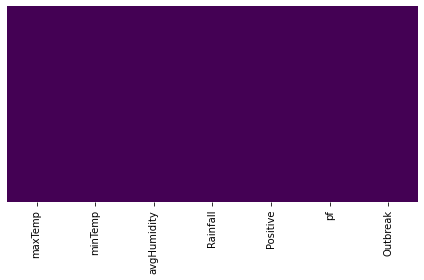

In [14]:
import seaborn as sns#customizing graph
def heatmap(df):
  plt.figure(figsize=(6,4))
  sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
  plt.tight_layout()
  return plt.show()
heatmap(df)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
#x_test = sc.transform(x)

In [16]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
x_train

array([[ 1.04281737,  0.91841276,  0.80622383,  1.2157294 ],
       [ 0.09416784, -0.19473574, -0.05660526,  0.02992981],
       [ 0.4041491 , -0.50014072,  0.40646162, -0.8494272 ],
       [-0.24654431, -0.68443683,  0.92798429,  1.6554079 ],
       [-0.95268695, -0.46117526,  0.427204  ,  0.64725619],
       [ 0.68673977,  1.83041522,  0.29790085,  0.24754846],
       [-1.34550803, -0.68443683,  0.10960315, -0.4053075 ],
       [ 0.37208207, -0.68443683,  1.1001191 ,  1.37117129],
       [-1.13039172, -0.68443683, -1.7421256 , -1.22692894],
       [ 1.41025205,  3.67548256,  0.85040241,  1.08693469],
       [ 0.34201923, -0.31163213, -0.69665582, -0.844986  ],
       [-0.6787811 , -0.68443683,  1.46270666,  1.93076211],
       [ 1.12966557,  0.48979267,  0.53037713,  0.34969599],
       [ 0.38009883, -0.16103588,  0.7905997 ,  0.9270516 ],
       [-0.56788264,  0.26969046, -0.94987447, -0.85386839],
       [-1.19719803, -0.68443683, -1.49995159, -1.2935469 ],
       [ 1.31338291,  0.

In [18]:
y_train

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [19]:
x_test

array([[-1.21790798, -0.45380341, -1.17507744, -0.844986  ],
       [-0.55184912, -0.68443683, -1.48890695, -1.18695817],
       [ 0.74419319, -0.3558632 ,  0.95384492,  0.00328262],
       [ 0.88916287,  0.04432264,  0.87976499, -0.05889413],
       [ 1.27931169,  0.07486314,  0.35474036,  0.06545938]])

In [20]:
y_test

array([[0],
       [0],
       [1],
       [1],
       [0]])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [22]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0])

In [23]:
print("predicted value for training data:",model.score(x_train,y_train))
print("predicted value for testing data:",model.score(x_test,y_test))

predicted value for training data: 0.9444444444444444
predicted value for testing data: 0.6


In [24]:
accuracy=model.score(x,y)*100
print(accuracy)

86.95652173913044
